# 1)Program to predict  the city or region of the observation


# 2)program to predict the average price of a single avocado

# problem statement

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [2]:
df=pd.read_csv("avacado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [4]:
df.shape

(1517, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Finding null values

In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

no missing columns

# Exploring Attributes

In [8]:
df.type.value_counts()


conventional    1517
Name: type, dtype: int64

In [9]:
#this columnn has only one value throughout the dataset so it will not help us in any way so lets drop
df.drop(columns=["type"],inplace=True)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


In [10]:
df.region.unique().shape

(51,)

In [11]:
df.region.value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
Roanoke                17
DallasFtWorth          17
MiamiFtLaude

In [12]:
df.year.value_counts()

2015    1270
2016     247
Name: year, dtype: int64

In [13]:
df["year"] = df["year"].astype('category')
df.dtypes

Unnamed: 0         int64
Date              object
AveragePrice     float64
Total Volume     float64
4046             float64
4225             float64
4770             float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
year            category
region            object
dtype: object

In [14]:
df["year"] = df["year"].cat.codes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  year          1517 non-null   int8   
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), int8(1), object(2)
memory usage: 143.8+ KB


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [17]:
df["region"] = df["region"].astype('category')
df.dtypes

Unnamed: 0         int64
Date              object
AveragePrice     float64
Total Volume     float64
4046             float64
4225             float64
4770             float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
year                int8
region          category
dtype: object

In [18]:
df["region"] = df["region"].cat.codes


In [19]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,1,7
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,1,7
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,1,7
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,1,7
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,1,7


In [20]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year               int8
region             int8
dtype: object

In [21]:
#there are column "Date","Unmaned: 0" in the dataset that we can drop as it does not helps 
df.drop(["Date","Unnamed: 0"], axis=1, inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,1,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,1,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,1,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,1,7


In [22]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.162821,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,16.132398
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.000000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,1.000000,50.000000


KEY OBSERVATION:
    
    There are no missing values
    
    Here we find that the median is higher than mean in "Total Volume","4056","4770","Total bags","Small bags","Large bags","generosity".

If the mean is less than the median, the distribution is negatively skewed.

    2)the maximum and the 75% had a wide range of difference than it have to be normal in attributes "4046","4225","4770","Large bags","small bags"

 we infer that we may have large outliers in some of the attributes and skewness



# Exploratory Data Analysis

# 1) univariate analysis

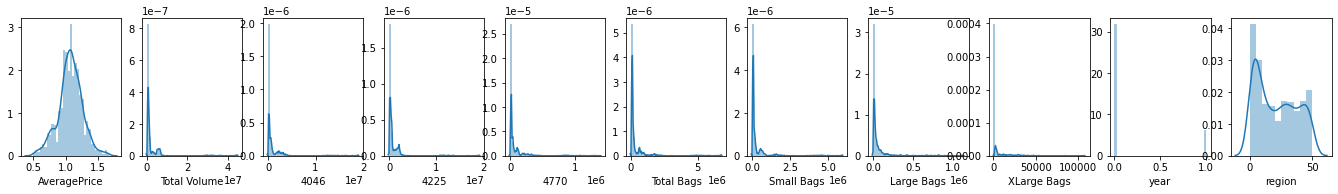

In [23]:
#univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
collist=df.columns.values
ncol=14
nrow=10
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

except Avereage all attributes are unevenly distributed

# 2)Multivariate analysis

# Correlation

In [24]:
cor=df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,0.236579
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,0.269481
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,0.215733
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,0.297452
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,-0.046144
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.470472


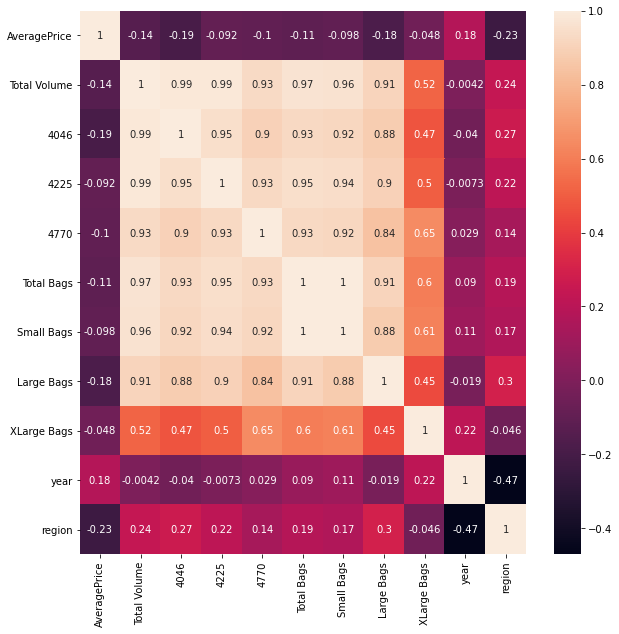

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)
plt.show()

Key observation

from the above result it is clear that some columns making positive correlation while some has negative correlation to the target variable 

columns making positive correlation

1)Total Volume

2)4046

3)4225

4)4770 

5)Total Bags  

6)Small Bags

7)Large Bags

columns making negative correlation

1)AveragePrice

2)year                   

3)XLarge Bags                 
                  




# DATA CLEANING

In [26]:
# checking for skewness
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

the skewness is very high than the threshold limit +/-0.55

In [27]:
#Skewness treatment
#By seeing we can say only positive skewness is significant and needed to be treated
#treating using log
import numpy as np
for i in df.columns:
    if df.skew().loc[i]>1:
        df[i]=np.log1p(df[i])
    

In [28]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
region          0.288146
dtype: float64

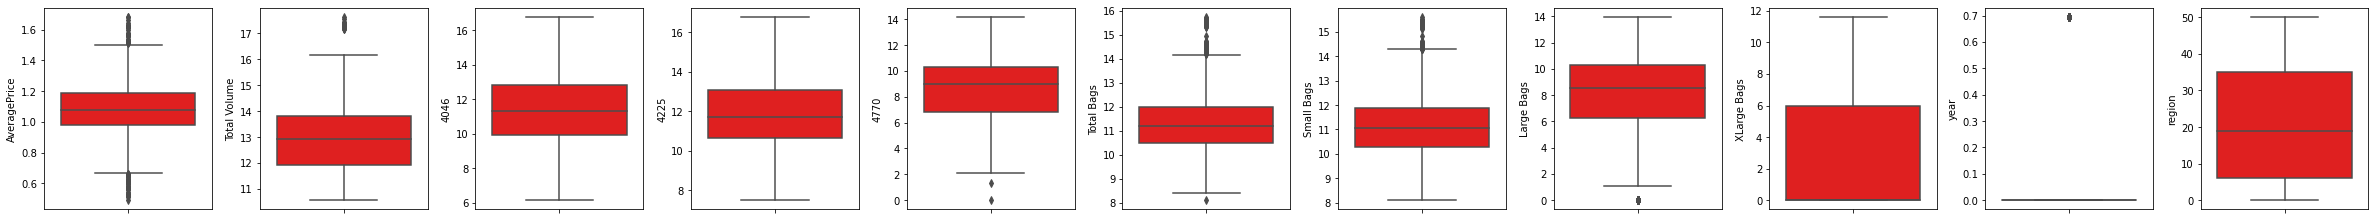

In [29]:
collist=df.columns.values
ncol=30
nrow=15
plt.figure(figsize=(3*ncol,3*nrow))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="red",orient="v")
    plt.tight_layout()

we find more outliers in most of the attributes.so outliers treatment is not preferable since it may lead to large amoumt of loss of datas

In [30]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,13.019328,11.216036,11.871686,8.557664,11.389344,11.200721,7.848268,2.844177,0.112915,21.196440
std,0.188891,1.436970,2.337126,1.703644,2.575991,1.376649,1.391181,3.417046,3.509129,0.256104,16.132398
min,0.490000,10.564931,6.150006,7.487045,0.000000,8.105540,8.105540,0.000000,0.000000,0.000000,0.000000
25%,0.980000,11.901387,9.923356,10.632896,6.815914,10.497032,10.299852,6.294786,0.000000,0.000000,6.000000
50%,1.080000,12.906178,11.311448,11.684067,8.947568,11.211551,11.040947,8.526222,0.000000,0.000000,19.000000
75%,1.190000,13.797322,12.841536,13.092216,10.280838,11.967883,11.892733,10.284273,5.997645,0.000000,35.000000
max,1.680000,17.614487,16.756419,16.757656,14.138693,15.723022,15.589385,13.929801,11.590570,0.693359,50.000000


Data cleaning is done . 

# 1)Predicting Region of the observation(Classification)

# Seperating Independent(input) and Dependant variables(Target)

In [31]:
#for target variable "Region"
x_class=df.drop(["region"],axis=1)
y_class=df["region"]

In [32]:
x_class.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0.0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0.0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0.0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0.0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0.0


In [33]:
y_class.head(2)

0    0
1    0
Name: region, dtype: int8

# Scaling input variables

 Algorithms requires all features to be on common scale. 

In [34]:
#using StandardScaler techinique
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_class)
x



array([[ 1.35048079, -1.35676174, -1.82816171, ..., -0.96674301,
        -0.81077519, -0.44100815],
       [ 1.45639674, -1.46638736, -2.01206913, ..., -0.95386092,
        -0.81077519, -0.44100815],
       [-0.76783831, -0.9321394 , -1.94183376, ..., -0.93753117,
        -0.81077519, -0.44100815],
       ...,
       [ 2.14485045, -0.64565294, -0.20190426, ...,  0.34275114,
         1.10389091,  2.26753179],
       [ 2.09189247, -0.60503087, -0.13577946, ...,  0.34346272,
        -0.81077519,  2.26753179],
       [ 1.88006056, -0.62805557, -0.23299293, ...,  0.44343485,
        -0.81077519,  2.26753179]])

# Selecting best algorithms

Since the target is a Multiclass Classification with more than 2 variable we use

1)Support vector machine algorithm

2)k-nearest neighbors algorithm



In [35]:
#Splitting dataframe for target "Region"
#importing required library
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 1)Support Vector Machine

In [36]:
#finding best random state for prediction
from sklearn.svm import SVC
svc=SVC()
for i in range(1,200):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y_class,random_state=i,test_size=0.20)
    svc.fit(x_train,y_train)
    svc_train=svc.predict(x_train)
    svc_pred=svc.predict(x_test)
    if round(accuracy_score(y_train,svc_train)*100,1)==round(accuracy_score(y_test,svc_pred)*100,1):
        print("At Random state ", i ,"the model is performing well")
        print("At Random state : ",i)
        print("Training accuracy score is :",accuracy_score(y_train,svc_train)*100)
        print("Testing accuracy score is :",accuracy_score(y_test,svc_pred)*100)


At Random state  33 the model is performing well
At Random state :  33
Training accuracy score is : 94.06430338004947
Testing accuracy score is : 94.07894736842105
At Random state  181 the model is performing well
At Random state :  181
Training accuracy score is : 92.08573784006595
Testing accuracy score is : 92.10526315789474


In [37]:
#Hyerparameter tuning for SVM 
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters={"kernel":["linear","poly","rbf","sigmoid"],"gamma":["scale","auto"]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'gamma': 'scale', 'kernel': 'linear'}


For SVM Model:
    
    The best random state is 33
    
    The best parameters are {'gamma': 'scale', 'kernel': 'linear'}

In [38]:
#cross validation to ensure underfitting/overfitting
from sklearn.model_selection import cross_val_score
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
svc_r2=accuracy_score(y_test,svc_pred)
for i in range(50,60):
    svc_cvs=cross_val_score(svc,x,y_class,cv=i)
    svcmean=svc_cvs.mean()
    print("At cv : ",i)
    print("cv score : ",svcmean*100 )
    print("accuracy is",svc_r2*100)
    print("difference is:",{(svcmean*100)-(svc_r2*100)})


At cv :  50
cv score :  92.39784946236558
accuracy is 90.78947368421053
difference is: {1.6083757781550503}
At cv :  51
cv score :  92.71805273833672
accuracy is 90.78947368421053
difference is: {1.928579054126189}
At cv :  52
cv score :  92.84482758620689
accuracy is 90.78947368421053
difference is: {2.055353901996355}
At cv :  53
cv score :  92.6828701552189
accuracy is 90.78947368421053
difference is: {1.8933964710083586}
At cv :  54
cv score :  92.64048531289914
accuracy is 90.78947368421053
difference is: {1.8510116286886102}
At cv :  55
cv score :  92.65512265512265
accuracy is 90.78947368421053
difference is: {1.865648970912119}
At cv :  56
cv score :  92.65873015873015
accuracy is 90.78947368421053
difference is: {1.8692564745196165}
At cv :  57
cv score :  92.45763982606088
accuracy is 90.78947368421053
difference is: {1.6681661418503495}
At cv :  58
cv score :  92.48943904116317
accuracy is 90.78947368421053
difference is: {1.6999653569526316}
At cv :  59
cv score :  92.50586

In [39]:
#finding accuracy_score for SVM model
from sklearn.svm import SVC
svc=SVC(kernel="linear",gamma="scale",random_state=33)
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
svc_r2=accuracy_score(y_test,svc_pred)
print("accuracy is",svc_r2*100)


accuracy is 94.73684210526315


# 2)KNeighborsClassifier

In [40]:
#parameters for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
print(knn.get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [41]:
#Hyerparameter tuning for KNeighborsClassifier 
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameters={"algorithm":["auto", "ball_tree", "kd_tree", "brute"],"weights":["uniform","distance"]}
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'algorithm': 'auto', 'weights': 'distance'}


In [42]:
#cross validation to ensure underfitting/overfitting
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(algorithm="auto",weights="distance")
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_r2=accuracy_score(y_test,knn_pred)
for i in range(30,50):
    knn_cvs=cross_val_score(knn,x,y_class,cv=i)
    knnmean=knn_cvs.mean()
    print("At cv : ",i)
    print("cv score : ",knnmean*100 )
    print("r2 score is",knn_r2*100)
    print("difference is:",{(knnmean*100)-(knn_r2*100)})

At cv :  30
cv score :  95.3934640522876
r2 score is 94.07894736842105
difference is: {1.3145166838665432}
At cv :  31
cv score :  95.65229317533466
r2 score is 94.07894736842105
difference is: {1.5733458069136077}
At cv :  32
cv score :  95.38868572695036
r2 score is 94.07894736842105
difference is: {1.3097383585293016}
At cv :  33
cv score :  95.6477821695213
r2 score is 94.07894736842105
difference is: {1.5688348011002518}
At cv :  34
cv score :  95.45900178253119
r2 score is 94.07894736842105
difference is: {1.380054414110134}
At cv :  35
cv score :  95.40169133192389
r2 score is 94.07894736842105
difference is: {1.3227439635028304}
At cv :  36
cv score :  95.26578073089699
r2 score is 94.07894736842105
difference is: {1.1868333624759373}
At cv :  37
cv score :  95.31970995385632
r2 score is 94.07894736842105
difference is: {1.240762585435263}
At cv :  38
cv score :  95.65452091767878
r2 score is 94.07894736842105
difference is: {1.5755735492577259}
At cv :  39
cv score :  95.58462

# CONCLUTION

from both svm and Kneighbourclassifier we find that the Kneighbour perform well.

Also kneighbour algorithm is best suited for multiclass classification. So we go with it

# SAVING MODEL

In [65]:
import pickle
filename="avacado_region.pkl"
pickle.dump(rf,open(filename,"wb"))

In [44]:
import numpy as np
a=np.array(y_test)
predicted=np.array(knn.predict(x_test))
df_con=pd.DataFrame({"original":a,"Predicted":predicted})
df_con.head()

,original,Predicted
0,5,5
1,36,36
2,37,37
3,27,27
4,34,34


# 2) Predicting average price of avacado(Regression)

# Seperating Independent(input) and Dependant variables(Target)

In [45]:
#for target variable "Average price"
x_line=df.drop(["AveragePrice"],axis=1)
y_line=df["AveragePrice"]

In [46]:
#using StandardScaler techinique
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_l=sc.fit_transform(x_line)
x_l



array([[-1.35676174, -1.82816171, -0.56752404, ..., -0.81077519,
        -0.44100815, -1.3143384 ],
       [-1.46638736, -2.01206913, -0.68423257, ..., -0.81077519,
        -0.44100815, -1.3143384 ],
       [-0.9321394 , -1.94183376, -0.15924137, ..., -0.81077519,
        -0.44100815, -1.3143384 ],
       ...,
       [-0.64565294, -0.20190426, -0.58460671, ...,  1.10389091,
         2.26753179, -0.88028586],
       [-0.60503087, -0.13577946, -0.57688492, ..., -0.81077519,
         2.26753179, -0.88028586],
       [-0.62805557, -0.23299293, -0.5703497 , ..., -0.81077519,
         2.26753179, -0.88028586]])

# Selecting best algorithms

since our target is continuous the following regression methods are used

1)lasso

2)Decision Tree Regressor

3)Random forest Regression

4)Ridge Regression

5)Support Vector Machine

6)Linear Regression

7)SGD Regressor




In [47]:
#Splitting dataframe for target "AveragePrice"
#importing required library
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_l,y_line,test_size=.30)

# 1)Lasso

In [49]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [50]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_pred=ls.predict(x_test)
ls.score(x_train,y_train)
ls_r2=r2_score(y_test,ls_pred)
ls_cvscore=cross_val_score(ls,x_l,y_line,cv=5).mean()
print("r2_score is : ",ls_r2*100)
print("cv score is ", ls_cvscore*100)
 

r2_score is :  42.373524998407206
cv score is  12.777592121251875


# 2) Decision Tree Regressor

In [51]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={"criterion":["friedman_mse","mse","mae"],"splitter":["best","random"]}
dtr=DecisionTreeRegressor()
clf=GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'random'}


In [52]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion="mse",splitter="best")
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
dtr_r2=r2_score(y_test,dtr_pred)
dtr_cvscore=cross_val_score(dtr,x_l,y_line,cv=7).mean()
print("r2_score is : ",dtr_r2*100)
print("cv score is ",abs(dtr_cvscore*100))

r2_score is :  62.37817061315193
cv score is  74.18115981224545


# 3)Random forest Regression

In [53]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={"criterion":["friedman_mse","mae"],"n_estimators":[100,200,300]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 300}


In [70]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(criterion="mae",n_estimators=300)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_r2=r2_score(y_test,rf_pred)
rf_cvscore=cross_val_score(rf,x_l,y_line).mean()
print("r2_score is : ",rf_r2*100)
print("cv score is ",(rf_cvscore*100))


r2_score is :  80.69801494260365
cv score is  15.51088168278853


# 4) Ridge Regression

In [55]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameters={"alpha":[.0001,.001,.01,.1,1,10,100],"random_state":list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [56]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=0.01,random_state=0)
rd.fit(x_train,y_train)
rd_pred=rd.predict(x_test)
rd_r2=r2_score(y_test,rd_pred)
rd_cvscore=cross_val_score(rd,x_l,y_line,cv=5).mean()
print("r2_score is : ",rd_r2*100)
print("cv score is ",abs(rd_cvscore*100))

r2_score is :  42.469389273653945
cv score is  12.875466442597913


# 5) Support Vector Machine

In [57]:
#Hyerparameter tuning for SVM 
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
parameters={"kernel":["linear","poly","rbf","sigmoid"],"gamma":["scale","auto"]}
svr=SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'gamma': 'scale', 'kernel': 'rbf'}


In [58]:
from sklearn.svm import SVR
svr=SVR(kernel="rbf",gamma="auto")
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)
svr_r2=r2_score(y_test,svr_pred)
svr_cvscore=cross_val_score(svr,x_l,y_line,cv=72).mean()
print("r2_score is : ",svr_r2*100)
print("cv score is ",abs(svr_cvscore*100))

r2_score is :  72.97507069863552
cv score is  67.89367433472096


# 6)Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100}")


Accuracy=42.47090877965402,
cross_value_score=34.124706564337096


# 7) SGD Regressor

In [60]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
parameters={"alpha":[.0001,.001,.01,.1,1,10,100],"random_state":list(range(0,10))}
sgd=SGDRegressor()
clf=GridSearchCV(sgd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 7}


In [61]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(alpha=0.0001,random_state=0)
sgd.fit(x_train,y_train)
sgd_pred=sgd.predict(x_test)
r2score=r2_score(y_test,sgd_pred)
cvscore=cross_val_score(sgd,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100}")


Accuracy=36.62680136487118,
cross_value_score=30.265458709171806


from all the above regressor model ,we find only Random Forest Regressor performs well.so we choose Random Regressor as our best model  

# Conclusion

In [62]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_li=pd.DataFrame({"original":a,"Predicted":predicted})
df_li.head()

,original,Predicted
0,1.03,1.0891
1,0.93,0.9189
2,1.33,1.3796
3,1.24,1.2084
4,1.09,1.2290


In [64]:
import pickle
filename="Avacado_avg_price.pkl"
pickle.dump(rf,open(filename,"wb"))